In [84]:
# Importujemy wymagane biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Ustawienie trybu inline dla wykresów
%matplotlib inline

# Załadowanie zbioru danych Iris
iris = load_iris()

# Tworzymy DataFrame z odpowiednimi nazwami kolumn
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['variety'] = iris.target
df['variety'] = df['variety'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Wyświetlamy pierwsze 5 wierszy, aby sprawdzić poprawność załadowanych danych
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Sprawdzenie kształtu danych i podstawowych informacji


Po użyciu df.info() widzimy, że długości i szerokościu kielicha i płatków mają typ float64, a variety ma typ object.


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   variety            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Widzimy, że istnieje 150 wierszy i 5 kolumn


In [86]:
df.shape

(150, 5)

Po sprawdzeniu i zsumowaniu wartości null, widać że jest ich 0 w każdej kolumnie, co oznacza że nie nasz zbiór danych nie posiada pustych wartości.


In [87]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
variety              0
dtype: int64

Po usunięciu duplikatów dostalismy trzy unikalne typy irysów, a więc posiadamy tylko trzy rodzaje.


In [88]:
data = df.drop_duplicates(subset ="variety",)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


Po narysowaniu histogramu widać, że każdy typ kwiatu występuje dokładnie 50 razy.


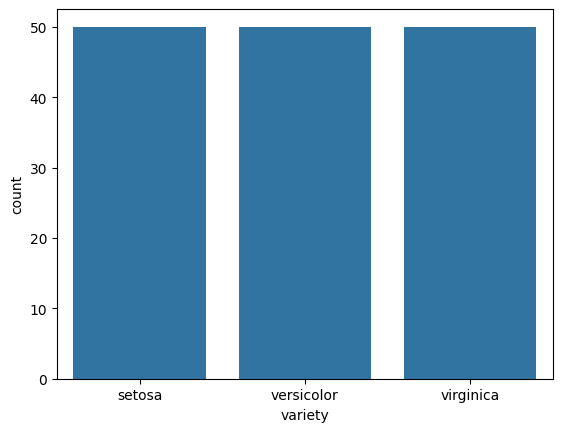

In [89]:
sns.countplot(x='variety', data=df, )
plt.show()

# Początkowe rozeznanie w danych zbioru IRIS

Po wykorzystaniu funkcji describe możemy zauważyć kilka ciekawych statystyk o naszym zbiorze, np. widać że liczba policzonych wartości dla każdej kolumny wynosi 150, czyli nie posiadamy niepoliczonych pól, widzimy także średnią, odchylenie standrardowe, jakies min 25 50% 75% maksimum, widac ze srednia dlugosci jest najwieksza, odchylenie standrardowe jest dosc niskie, najwieksze ma dlugosc platku, nie wiem co tu jeszcze mówić


In [90]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Analiza zmienności cech


### Analiza Pairplotu

Poniższy Pairplot przedstawia relacje między wszystkimi zmiennymi w zbiorze danych. Na podstawie wykresów można zaobserwować następujące zależności:

- **Setosa** wyróżnia się najmniejszą długością kielicha oraz płatka. Jednocześnie charakteryzuje się dość grubym kielichem i wąskim płatkiem, co może stanowić istotną cechę pozwalającą na łatwe odróżnienie jej od pozostałych gatunków.

- **Versicolor** i **Virginica** mają zbliżone długości oraz szerokości kielichów. Różnicę między nimi można zauważyć w przypadku płatków – Virginica posiada nieco dłuższe i grubsze płatki, co może być pomocne w ich rozróżnieniu.

- Należy jednak zwrócić uwagę, że ze względu na dość podobne parametry Versicolor i Virginica, model może mieć trudności z poprawnym zaklasyfikowaniem niektórych przypadków, co może skutkować błędami w predykcji.

Pairplot dostarcza istotnych informacji o cechach charakterystycznych poszczególnych gatunków, które mogą mieć znaczący wpływ na skuteczność budowanego modelu klasyfikacyjnego.


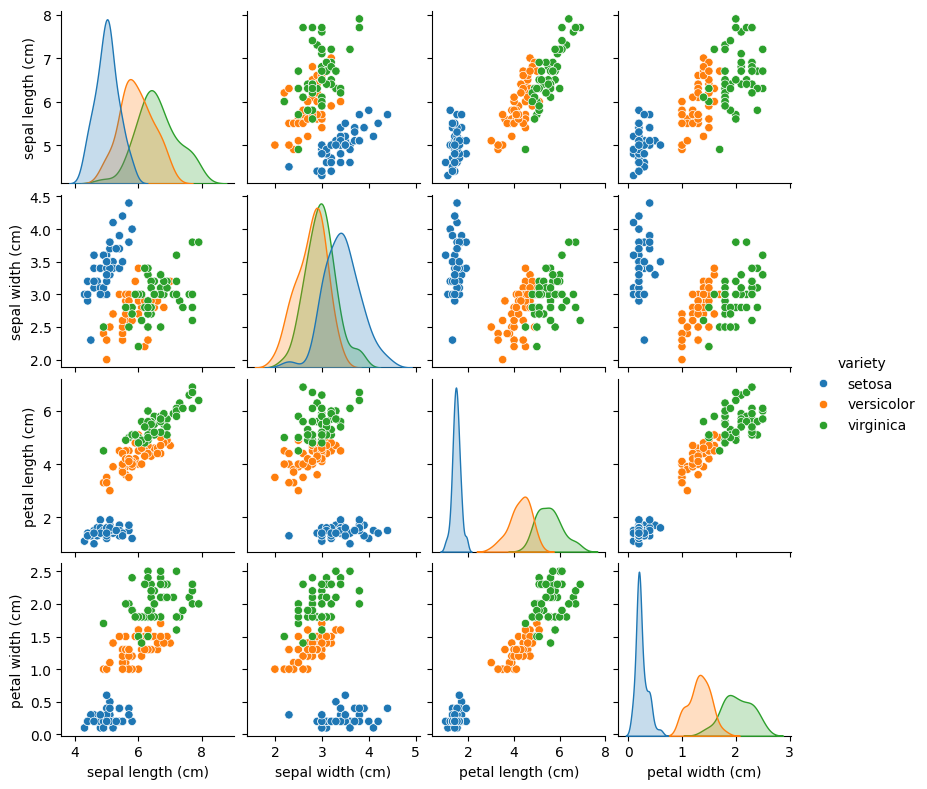

In [92]:
sns.pairplot(df, hue='variety', height=2)

### Analiza odchyleń i wartości odstających

Na podstawie boxplotów można zauważyć następujące informacje dotyczące odchyleń i wartości odstających:

- **Setosa**

  - **Długość płatków** oraz **szerokość płatków** posiadają kilka wyraźnych wartości odstających, które znajdują się poniżej dolnej granicy (dolnego wąsa). Może to wskazywać na nietypowe obserwacje w danych, które warto dokładniej przeanalizować.

- **Versicolor**

  - **Szerokość kielichów** posiada pojedynczą wartość odstającą poniżej dolnej granicy, co wskazuje na rzadki przypadek wyjątkowo wąskiego kielicha.

- **Virginica**
  - Nie widać wyraźnych wartości odstających w żadnej z analizowanych cech, co świadczy o bardziej jednolitym rozkładzie danych w przypadku tego gatunku.

---

Można dojść do wniosku, że najistotniejszy wpływ na wyniki mogą mieć wartości odstające dla gatunku Setosa. W dwóch pozostałych gatunkach wartości są na tyle stabilne, że nie powinny wpływać negatywnie na działanie modelu.


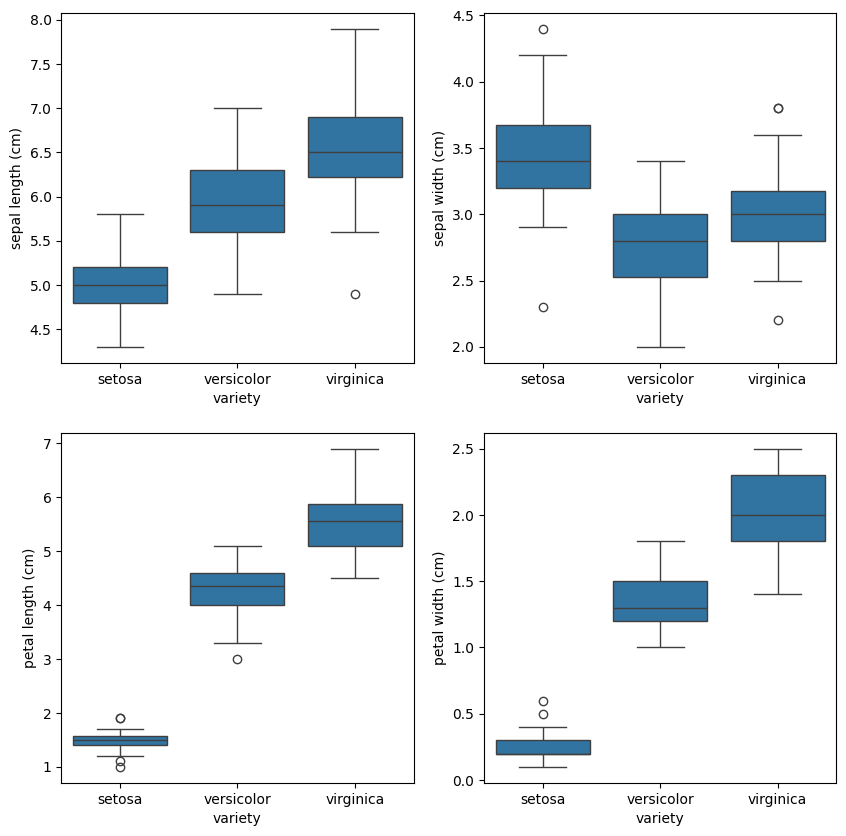

In [95]:
def graph(y):
    sns.boxplot(x="variety", y=y, data=df)

plt.figure(figsize=(10,10))
    
plt.subplot(221)
graph('sepal length (cm)')

plt.subplot(222)
graph('sepal width (cm)')

plt.subplot(223)
graph('petal length (cm)')

plt.subplot(224)
graph('petal width (cm)')

plt.show()